## TCAS Encounters

![TCAS](figures/TCAS_Volume.png)

# Week 3 Assignment - Encounter Plotting

### **Your task is to:**

1.  Load example aircraft tracks from a file and plot them.
2.  Propose a statistical model for capturing features from the data.

### **What is Turned In:**
Edit the contents of this notebook and turn in our final Julia notebook file (.ipynb), and any associated code files you wrote to Coursework. Do not use any external code or Julia packages other than those used in the class materials. For the second part of this assignment, please submit a document describing your proposed statistical model. 

### Aircraft Tracks

![Encounter](figures/encounter_plot.png)

An airspace encounter consists of two components - the initial conditions and the transitions over time.
One file is provided for each.

The data file, [`flights.csv`](http://web.stanford.edu/class/aa120q/data/flights.txt), contains a table with the following columns:

| Variable | Type | Description |
| -------- |:----:| ----------- |
| **id**                  | Int   | trace id, same as in `initial.txt`    |
| **t**                   | Int   | time in 1s intervals from 0 to 50    |
| **x1**       | Float  | position along x-axis |  **x2**       | Float  | position along x-axis |
| **y1**      | Float  | position along y-axis |  **y2**      | Float  | position along y-axis |
| **u1**                  | Float   | airplane 1 vertical speed [m/s] | **u2**                  | Float   | airplane 2 vertical speed [m/s]   |
| **v1**                  | Float   | airplane 1 horizontal speed [m/s]  | **v2**                  | Float   | airplane 2 horizontal speed [m/s]    |

Write a program to load these trajectories and plot them.

1.  Your algorithm must be implemented from scratch in Julia.
2.  Although you may discuss your algorithm with others, you must not share code.

Directions

* Implement `pull_trajectory` to load a specific `Trajectory` from flights
* Modify `plot_trajectory` to indicate the location of minimim separation

# Milestone One: Implement Pull_Trajectory

Your task is to implement the **pull_trajectory(flights::DataFrame, id::Int)**. Pull_encounter is a function that takes in two parameters, the DataFrame that stores the transitions over time and the trace id. This function will prepare an "Encounter" data structure for plotting, by initializing an array of 51 EncounterStates that reveals the AircraftState of both airplanes at each second in the 51 second time interval. 

## Data Structures

Below, we will first load the data from our "flights.csv" text file which stores information about the position and velocities of both aircraftat at each time step. We have also defined two types, AircraftState which describes the position and velocity of an aircraft and EncounterState, which defines the states of both aircraft at a given time step. We also have a constant called "Trajectory" which is a vector of EncounterStates. You will be using the data structure along with these two types to load the data into the Trajectory constant and analyze the trajectories of both aircraft.

### DataFrames

Remember that an airplane encounter consists of the initial conditions and the transitions over time. To implement Pull_Encounter, you will be given one data frame EncounterState, that stores the states of both aircraft over each second of the time interval. You will need to load an array with the values of both aircraft states.

#### Inital Conditions DataFrame

In [1]:
# Load initial.txt as a DataFrame
using DataFrames, CSV

flights = CSV.read(joinpath(@__DIR__, "..", "data", "flights.csv"))
flights[1:3,:]

,id,x1,y1,u1,v1,x2,y2,u2,v2,t
,Int64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,1,0.0,10313.0,224.604,0.0213703,-897.73,10112.0,243.037,0.480057,0
2,1,224.638,10313.0,224.673,-0.0922206,-654.645,10112.5,243.131,0.458075,1
3,1,449.327,10312.9,224.705,-0.185167,-411.497,10113.0,243.165,0.448498,2


### Types

#### `AircraftState`

This is a type which describes the aircraft state. You will need to create air craft states for each time step given by the data set above. 

In [2]:
struct AircraftState
    x::Float64  # horizontal position [m]
    y::Float64  # veritcal position   [m]
    u::Float64  # horizontal speed    [m/s]
    v::Float64  # vertical speed      [m/s]
end

#### `EncounterState` 

This is a type which describes an encounter between two aircraft by defining the two aircrafts's current state at the given time interval. This is the data structure that you will need to initialize in pull_encoutner.

In [3]:
mutable struct EncounterState
    plane1::AircraftState
    plane2::AircraftState
    t::Float64
end

#### `Trajectory` 

In [4]:
const Trajectory = Vector{EncounterState}

Array{EncounterState,1}

### Pull_trajectory:

We have already loaded the data from "flights.csv" into a variable called flights above. Your task now is to get the data in flights, and store it into a Trajectory constant. This means that you will need to go through each time step and store the state of both aircraft into an EncounterState and load that into a vector. Your function should produce a vector of length 51 for each state of both your ego and intruder from time 0 to 50. 

This function will return a Trajectory, or a vector of EncounterStates. You will need to initialize the trajectory vector with the data from the flights.csv file that we loaded above. You will load them into a vector of 51 elements, one for each time step. 

### Starter Code:

In [5]:
function pull_trajectory(flights::DataFrame, id::Int)
    
    flightids = flights[:id] # Gets the data from the specific ID we pass in
    
    # STUDENT CODE START
    #STUDENT CODE END
    
    return traj # returns the vector of EncounterStates
end

pull_trajectory (generic function with 1 method)

In [6]:
pull_trajectory(flights, 1) # Test if function works

51-element Array{EncounterState,1}:
 EncounterState(AircraftState(0.0, 10313.039622514178, 224.60362513262163, 0.02137033852293519), AircraftState(-897.7295246747952, 10112.049974300095, 243.0374695645999, 0.48005710759158504), 0.0)                  
 EncounterState(AircraftState(224.63824998885147, 10312.995667334792, 224.6728748450813, -0.09222064878809014), AircraftState(-654.6453030694042, 10112.508884732344, 243.13097364618216, 0.4580751372747758), 1.0)   
 EncounterState(AircraftState(449.326955120694, 10312.862062854987, 224.7045354186037, -0.1851667209451261), AircraftState(-411.4973384189747, 10112.970259650147, 243.16495565467687, 0.4484983934689455), 2.0)      
 EncounterState(AircraftState(673.9824690192593, 10312.638710451658, 224.60649237852678, -0.23798311683189233), AircraftState(-168.3248659384161, 10113.39791777062, 243.1799893064405, 0.41503040368617833), 3.0)    
 EncounterState(AircraftState(898.5993241678365, 10312.400949724311, 224.6272179186275, -0.2462402037537

## Implement Plot_Separations

Now that you have the aircraft states loaded into an array you can graphically display the trajectories of the two aircraft over a period of time. We have done this for you with the plot_trajectory function below have given you the code. We would now like you to implement plot_separations, which will display the horizontal, vertical, and total separations of the two aircraft on the same plot. 

Take time to step through the function yourself and see how it is implemented because in the next part you will be asked to implement plot_separations, which will display the distance between the two aircraft horizontally, vertically, and in total.

### Plot_Trajectory 

This is the plot for the trajectories of both aircraft. It displays the path that both aircraft follow on an x-y plane. 

(Use the code provided below as a reference for your implementation of plot_separations)

In [7]:
using Plots; gr()

# Finds the overall serparation between two aircraft
get_separation(state::EncounterState) = hypot(state.plane1.x - state.plane2.x,
                                              state.plane1.y - state.plane2.y)
# Determines what is the minimum serparation between the two aircraft
get_min_separation(traj::Trajectory) = minimum(get_separation(s) for s in traj) 

# Finds the index of the minimum serparation 
find_min_separation(traj::Trajectory) = argmin([get_separation(s) for s in traj])

function plot_trajectory(traj::Trajectory) 
    d = get_min_separation(traj)  # closest dist 
    i = find_min_separation(traj) # index of closest dist

    palette=[colorant"0x52E3F6", colorant"0x79ABFF", colorant"0xFF007F"]
    t_arr = (collect(1:length(traj)).-1) # time interval
    
    # Gets the x and y values for both planes 
    x1_arr = map(s->s.plane1.x,traj)
    y1_arr = map(s->s.plane1.y,traj)
    x2_arr = map(s->s.plane2.x,traj)
    y2_arr = map(s->s.plane2.y,traj)

    # Plots the trajectories 
    p1 = plot(Vector{Float64}[x1_arr, x2_arr, [traj[i].plane1.x, traj[i].plane2.x]],
              Vector{Float64}[y1_arr, y2_arr, [traj[i].plane1.y, traj[i].plane2.y]],
              xlabel="x [m]", ylabel="y [m]", label=["Plane1" "Plane2" "Min Separation"],
              palette=palette, linewidth=4)
    
    # Plots the point where the minimum separation occurs 
    scatter!(p1, Vector{Float64}[Float64[traj[1].plane1.x], Float64[traj[1].plane2.x]],
                 Vector{Float64}[Float64[traj[1].plane1.y], Float64[traj[1].plane2.y]],
                 label=["Plane1 Initial" "Plane2 Initial"])
    
    plot(p1, size=(800,400))
end

plot_trajectory (generic function with 1 method)

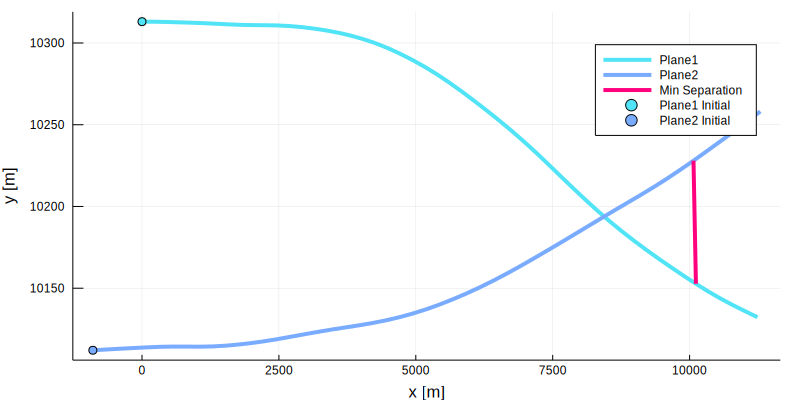

In [8]:
# To test function
traj = pull_trajectory(flights,1)
plot_trajectory(traj)

Now that you are familiar with plot_trajectory, you will need to implement plot_separation, which plots the distance between the two aircraft over time time. To implement the separation vs. time graph, we would like you to plot three lines:

1. The total seperation  ($\sqrt{\Delta x^2 + \Delta y^2}$)
2. X-position separation ($\Delta x$)
3. Y-position separation ($\Delta y$)

**Note:** You'll find hypot, abs, indmin, and norm useful in your implementation. If you're unfamiliar with these functions, look them up on the Julia documentation. 

### Starter Code:

In [9]:
using Plots; gr()

# Make use of these functions in your implementation
get_min_separation(traj::Trajectory) = minimum(get_separation(s) for s in traj)
find_min_separation(traj::Trajectory) = argmin([get_separation(s) for s in traj])

# STUDENT CODE START
# STUDENT CODE END

function plot_separations(traj::Trajectory)
    
    palette=[colorant"0x52E3F6", colorant"0x79ABFF", colorant"0xFF007F"]
    t_arr = collect(1:length(traj)).-1
    
    # Replace the comments with your code
    
    # sep_arr =    #total separation for each time interval
    # sep_x_arr =  #x-position separation for each time interval
    # sep_y_arr =  #y-position separation for each time interval
    
    # STUDENT CODE START
    # STUDENT CODE END
    
    # Plots the three separations
    plot(t_arr, Vector{Float64}[sep_arr, sep_x_arr, sep_y_arr],
         xlabel="Time [s]", ylabel="Separation [m]", 
         lab=["Total Separation [m]" "Horizontal Separation [m]" "Vertical Separation [m]"],
         palette=palette, linewidth=4,size=(800,400))
end

plot_separations (generic function with 1 method)

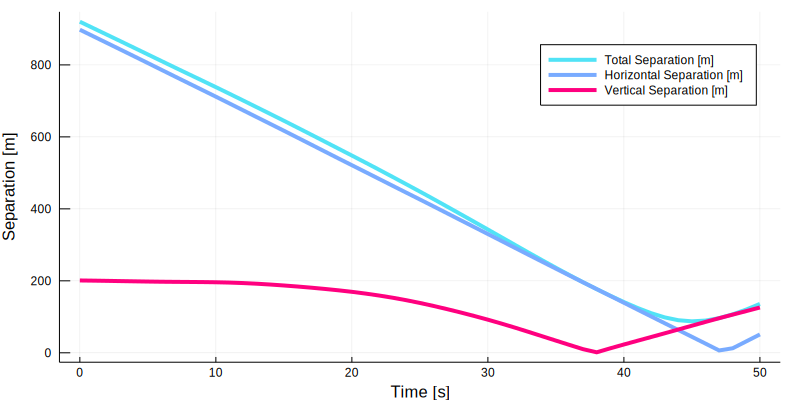

In [10]:
traj = pull_trajectory(flights,1)
plot_separations(traj) # test your function

### Propose an Encounter Model

Now that you are familiar with the Probabilistic Models discussed in class (and described in section 2.1 of DMU), you will propose an encounter model. Your model should be designed such that you can sample from it and produce initial positions for each aircraft. Your model should also support propagating the aircraft forward - ie, describe how the encounter changes over time from the initial setup.

You must explain the reasoning behind your decision, how it captures the initial and transition distributions, and how it can be learned from large initial and transition data tables.